<a href="https://colab.research.google.com/github/John3814/UDEA-ai4eng-20251---Pruebas-Saber-Pro-Colombia/blob/main/03%20-%20modelo%20RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Cargar datos de train y test

In [ ]:
!pip install gdown
!gdown 'https://drive.google.com/uc?id=1Md5kWdoNziQCGr8LvYwy60K5CEbxdc-a'
!gdown 'https://drive.google.com/uc?id=1QOpDvy3w3wTstuQCd1rPpLxVpdOxDPRu'

Downloading...
From (original): https://drive.google.com/uc?id=1Md5kWdoNziQCGr8LvYwy60K5CEbxdc-a
From (redirected): https://drive.google.com/uc?id=1Md5kWdoNziQCGr8LvYwy60K5CEbxdc-a&confirm=t&uuid=075a51fe-5bde-4239-8bf2-bd7961d4d6e2
To: /content/train.csv
100% 144M/144M [00:01<00:00, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1QOpDvy3w3wTstuQCd1rPpLxVpdOxDPRu
To: /content/test.csv
100% 59.2M/59.2M [00:00<00:00, 112MB/s]


# Revisión de los datos antes del tratamiento

Lo primero que se realiza es una revisión de los datos, esto para entender como están compuestos dichos dato, como por ejemplo conocer cuantas columnas, los nombres de las columnas, el tipo de dato de la columna y encontrar si hay valores faltante y hacer un análisis preliminar de las posibles transformaciones que se deben realizar.


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [ ]:
df.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


# Tratamiento de los datos

Se definen la funciones para tratar cada columna, realizando la limpieza, sustituyendo valores faltantes de ser necesario y codificando numéricamente los valores de las columnas.

### Modificación del index de los datos
Esta función convierte los valores de la columna ID en el index de los datos, esto se hace para facilitar las próximas transformaciones y tratamiento de las demás columnas.

In [ ]:
def modify_index(df):
  df = df.set_index('ID')
  return df

### Tratamiento a FAMI ESTRATOVIVIENDA

El tratamiento que se aplica a esta variable es bastante simple, lo primero es revisar los valores únicos presentes es esta columna, es este caso esos valores son ('Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1', nan, 'Estrato 6', 'Sin Estrato'). Con estos datos podemos ver que existe un posible orden natural en las categorías que se presenta, sin embargo vemos que existe un valor **‘Sin Estrato’** y que existen campos con valores **NaN**.

Para el caso del valor **‘Sin Estrato’**, se opto por seguir la lógica de estratificación de las viviendas en Colombia, donde dicha categoría es asignada a viviendas que se encuentran en rancherías o en zonas rurales, no cuentan con servicios de primera necesidad y que además pueden estar en zonas de alta vulnerabilidad. Teniendo en cuenta lo anterior se **opto por reasignar a los campos que tiene este valor el valore de ‘Estrato 0’**.

Luego para los datos **NaN** se realiza una reasignación bastante simple. En este caso y se optó por sustituir o rellenar estos datos con **la moda** de dicha columna. Esto como tratamiento preliminar y con la posibilidad de cambiarse por una estrategia más robusta en un futuro de ser necesario para mejorar el rendimiento del modelo predictivo. Por el momento se opta por el procedimiento simple.

Finalmente, se extrae el valor numérico de cada categoría (0, 1, 2…) y se reasigna este valor como dato numérico en la columna.

In [ ]:
df.FAMI_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
def treat_column_fami_estratovivienda(df):
    # Imprime los valores únicos de la columna antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_ESTRATOVIVIENDA.unique())

    # Reemplaza el valor 'Sin Estrato' por 'Estrato 0' para facilitar el procesamiento
    df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', 'Estrato 0')

    # Obtiene la moda (valor más frecuente) de la columna
    moda_estrato = df.FAMI_ESTRATOVIVIENDA.mode()[0]

    # Rellena los valores nulos (NaN) con la moda
    df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].fillna(moda_estrato)

    # Extrae el número del texto (por ejemplo, de 'Estrato 1' extrae 1) y lo convierte a entero
    df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].str.extract('(\d+)').astype(int)

    # Imprime los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_ESTRATOVIVIENDA.unique())

    # Devuelve el DataFrame modificado
    return df



### Tratamiento a FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE
Para estas dos columnas el tratamiento es el mismo para ambas, lo primero fue conocer los datos de dichas columnas para establecer como esta estructurada la información. Al revisar los datos se llegó a la conclusión de que en las categorías presentes en esta columna existe un orden natural, lo que permite una codificación numérica mas simple.

Lo primero fue definir el orden natural de las categorías, y almacenarlas en un diccionario de modo que se puede usar luego para recodificar los valores de las columnas. Al igual que en los anteriores casos se remplazan los valores NaN por la moda de cada columna y luego se procede a codificar los campos de las columnas con los datos numéricos correspondientes del diccionario que se creo con el orden natural.


In [ ]:
# Diccionario que asigna un valor numérico al nivel educativo en orden creciente
orden_educacion = {
    'Ninguno': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 4,
    'Técnica o tecnológica incompleta': 5,
    'Técnica o tecnológica completa': 6,
    'Educación profesional incompleta': 7,
    'Educación profesional completa': 8,
    'Postgrado': 9,
}

In [ ]:
# Función para tratar la columna FAMI_EDUCACIONPADRE
def treat_column_fami_educacionpadre(df):
    # Imprime los valores únicos antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_EDUCACIONPADRE.unique())

    # Reemplaza valores que no aportan (como 'No Aplica' y 'No sabe') por NaN
    df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].replace(['No Aplica', 'No sabe'], np.nan)

    # Imputa los valores faltantes con la moda (valor más frecuente)
    moda_educacion_padre = df.FAMI_EDUCACIONPADRE.mode()[0]
    df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].fillna(moda_educacion_padre)

    # Convierte las categorías en valores numéricos según el diccionario definido
    df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map(orden_educacion)

    # Imprime los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_EDUCACIONPADRE.unique())

    # Retorna el DataFrame modificado
    return df

In [ ]:
# Función para tratar la columna FAMI_EDUCACIONMADRE
def treat_column_fami_educacionmadre(df):
    # Imprime los valores únicos antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_EDUCACIONMADRE.unique())

    # Reemplaza valores irrelevantes por NaN
    df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].replace(['No Aplica', 'No sabe'], np.nan)

    # Imputa valores faltantes con la moda
    moda_educacion_madre = df.FAMI_EDUCACIONMADRE.mode()[0]
    df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].fillna(moda_educacion_madre)

    # Mapea los niveles educativos a valores numéricos según el diccionario
    df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map(orden_educacion)

    # Imprime los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_EDUCACIONMADRE.unique())

    # Retorna el DataFrame modificado
    return df

### Tratamiento FAMI_TIENELAVADORA, FAMI_TIENECOMPUTADOR, FAMI_TIENEINTERNET y FAMI_TIENEAUTOMOVIL
Durante la primera inspección de los datos se noto que los estas columna tienen valores en común (Si, No y NaN), además de que estas columnas representan datos del nivel socio económico de la familia del estudiante.

El tratamiento para estas columnas es similar, sin embargo, se opta por establecer una función para dar tratamiento a cada columna. El tratamiento es simple, primero se remplazan los valores NaN por la moda de cada columna y luego se codifica numéricamente asi (0 si el valor es No y 1 si el valore es Si).


In [ ]:
def treat_column_fami_internet(df):
    # Imprime los valores únicos de la columna antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_TIENEINTERNET.unique())

    # Obtiene la moda (valor más frecuente) de la columna
    moda_internet = df.FAMI_TIENEINTERNET.mode()[0]

    # Rellena los valores nulos (NaN) con la moda
    df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].fillna(moda_internet)

    # Convierte los valores categóricos 'Si' y 'No' a valores numéricos 1 y 0 respectivamente
    df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map({'No': 0, 'Si': 1})

    # Imprime los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_TIENEINTERNET.unique())

    # Devuelve el DataFrame modificado
    return df

In [ ]:
def treat_column_fami_computador(df):
    # Imprime los valores únicos antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_TIENECOMPUTADOR.unique())

    # Calcula la moda para llenar los valores faltantes
    moda_computador = df.FAMI_TIENECOMPUTADOR.mode()[0]

    # Rellena NaN con la moda
    df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].fillna(moda_computador)

    # Convierte 'Si' y 'No' en valores numéricos binarios
    df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map({'No': 0, 'Si': 1})

    # Imprime los valores únicos luego del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_TIENECOMPUTADOR.unique())

    # Retorna el DataFrame modificado
    return df

In [ ]:
def treat_column_fami_lavadora(df):
    # Imprime los valores únicos de la columna antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_TIENELAVADORA.unique())

    # Calcula la moda (valor más frecuente) para imputar valores faltantes
    moda_lavadora = df.FAMI_TIENELAVADORA.mode()[0]

    # Rellena valores nulos con la moda
    df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].fillna(moda_lavadora)

    # Convierte los valores 'Si' y 'No' a 1 y 0 respectivamente
    df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map({'No': 0, 'Si': 1})

    # Muestra los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.FAMI_TIENELAVADORA.unique())

    # Retorna el DataFrame tratado
    return df


In [ ]:
def treat_column_fami_automovil(df):
    # Muestra los valores únicos antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.FAMI_TIENEAUTOMOVIL.unique())

    # Determina la moda para imputación
    moda_automovil = df.FAMI_TIENEAUTOMOVIL.mode()[0]

    # Imputa los valores faltantes con la moda
    df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].fillna(moda_automovil)

    # Mapea las respuestas a valores binarios (0 y 1)
    df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map({'No': 0, 'Si': 1})

    # Muestra los valores únicos después de la transformación
    print('Valores únicos después del tratamiento:\n', df.FAMI_TIENEAUTOMOVIL.unique())

    # Retorna el DataFrame actualizado
    return df


### Tratamiento a ESTU_PRIVADO_LIBERTAD
El tratamiento es similar al aplicado a las columnas anteriores, la principal diferencia esta en los campos que esta contiene y la codificación que se debe realizar. Primero se remplazan los valores faltantes por la moda (sin embargo, en la revisión preliminar no se muestra que estos existan). Luego se codifica asi (0 si el valor es N y 1 si el valor es S).

In [ ]:
def treat_column_estu_privado_libertad(df):
    # Imprime los valores únicos de la columna antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.ESTU_PRIVADO_LIBERTAD.unique())

    # Muestra el conteo de cada valor presente en la columna
    print(df.ESTU_PRIVADO_LIBERTAD.value_counts())

    # Calcula la moda (valor más frecuente) para imputar los valores faltantes
    moda_privado_libertad = df.ESTU_PRIVADO_LIBERTAD.mode()[0]

    # Rellena los valores nulos (NaN) con la moda
    df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].fillna(moda_privado_libertad)

    # Convierte los valores categóricos 'N' (No) y 'S' (Sí) en valores binarios 0 y 1
    df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].map({'N': 0, 'S': 1})

    # Imprime los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.ESTU_PRIVADO_LIBERTAD.unique())

    # Devuelve el DataFrame modificado
    return df


### Tratamiento a ESTU_PAGOMATRICULAPROPIO

En el análisis previo se observo que la columna cuenta con los valores (Si, No y NaN). El tratamiento que se aplica es simple, se remplazan los NaN por la moda y se codifica numéricamente asi (0 si el valor es No y 1 si el valor es SI). Igual al tratamiento que se ha aplicado a otras columnas con valores similares.

In [ ]:
def treat_column_estu_pagomatriculapropio(df):
    # Imprime los valores únicos de la columna antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', df.ESTU_PAGOMATRICULAPROPIO.unique())

    # Obtiene la moda (valor más frecuente) para usarla como imputación de valores faltantes
    moda_pago_matricula_propio = df.ESTU_PAGOMATRICULAPROPIO.mode()[0]

    # Rellena los valores nulos (NaN) con la moda
    df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].fillna(moda_pago_matricula_propio)

    # Convierte los valores categóricos 'Si' y 'No' a valores binarios 1 y 0 respectivamente
    df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].map({'No': 0, 'Si': 1})

    # Muestra los valores únicos después del tratamiento
    print('Valores únicos después del tratamiento:\n', df.ESTU_PAGOMATRICULAPROPIO.unique())

    # Retorna el DataFrame modificado
    return df

### Tratamiento a ESTU_HORASSEMANATRABAJA

Lo primero fue analizar los datos que componen dicha columna, lo que permitió establecer que existe un posible orden natural en los datos, incluso teniendo en cuenta que son valores entre rangos.

Lo primero es establecer cual es el orden natural y almacenarlo en un diccionario, luego se busca si existen valores faltante y se remplazan (en este caso se remplaza por la moda, una estrategia simple pero que de ser necesario se puede modificar por una mas robusta).

Cuando ya se tiene establecido el orden natural y se han eliminado las valores faltante se procede a realizar la codificación numérica de la columna con los datos del diccionario


In [ ]:
# Diccionario que asigna un valor numérico a cada categoría de horas trabajadas por semana
orden_horas_trabajo = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

In [ ]:
def treat_column_estu_horassemanatrabaja(df):
    # Imprime los valores únicos antes del tratamiento para revisar las categorías presentes
    print('Valores únicos antes del tratamiento:\n', df.ESTU_HORASSEMANATRABAJA.unique())

    # Obtiene la moda (valor más frecuente) para reemplazar los valores faltantes
    moda_horas_trabajo = df.ESTU_HORASSEMANATRABAJA.mode()[0]

    # Rellena los valores nulos con la moda
    df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].fillna(moda_horas_trabajo)

    # Aplica el mapeo definido en el diccionario para convertir las categorías a valores numéricos
    df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].map(orden_horas_trabajo)

    # Muestra los valores únicos luego del tratamiento
    print('Valores únicos después del tratamiento:\n', df.ESTU_HORASSEMANATRABAJA.unique())

    # Retorna el DataFrame modificado
    return df

### Tratamiento a ESTU_VALORMATRICULAUNIVERSIDAD
Luego de la revisión preliminar de los datos, se puede ver que la columna contiene varias categorías que representan rangos de valores, además también se encuentra que puede que estos rangos se pueden representar por un orden natural. En este caso se optó por la opción de establecer un orden natural.

Lo primero fue establecer un orden natural, el cual se almacena como diccionario. Luego se buscan los valores vacíos y se remplazan por la moda y finalmente de hace la codificación numérica de la variables usando el diccionario.


In [ ]:
# Diccionario que asigna un valor numérico a los distintos rangos de valor de matrícula
valor_matricula_orden = {
    'No pagó matrícula': 0,
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7
}

In [ ]:
def treat_column_estu_valormatriculauniversidad(df):
    # Muestra los valores únicos antes del tratamiento para inspección inicial
    print('Valores únicos antes del tratamiento:\n', df.ESTU_VALORMATRICULAUNIVERSIDAD.unique())

    # Calcula la moda (el valor más común) para imputar valores faltantes
    moda_valor_matricula = df.ESTU_VALORMATRICULAUNIVERSIDAD.mode()[0]

    # Rellena los valores faltantes con la moda
    df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(moda_valor_matricula)

    # Convierte los valores categóricos a numéricos usando el diccionario definido
    df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valor_matricula_orden)

    # Muestra los valores únicos tras la conversión
    print('Valores únicos después del tratamiento:\n', df.ESTU_VALORMATRICULAUNIVERSIDAD.unique())

    # Devuelve el DataFrame modificado
    return df

### Tratamiento a RENDIMIENTO_GLOBAL
El rendimiento global es nuestra columna objetivo, aun asi es necesario codificarla numéricamente. Para esto se define claramente un orden natural en el rendimiento del estudiante, este se almacena en un  diccionario y es usado para codificar numéricamente la columna.

In [ ]:
# Diccionario que asigna un valor numérico a cada nivel de rendimiento, en orden ascendente
orden_rendimiento = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}

In [ ]:
def treat_column_rendimiento_global(df):
    # Imprime los valores únicos antes del tratamiento para ver los niveles de rendimiento disponibles
    print('Valores únicos antes del tratamiento:\n', df.RENDIMIENTO_GLOBAL.unique())

    # Mapea los valores categóricos a valores numéricos según el diccionario ordenado
    df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(orden_rendimiento)

    # Imprime los valores únicos después de aplicar la transformación
    print('Valores únicos después del tratamiento:\n', df.RENDIMIENTO_GLOBAL.unique())

    # Devuelve el DataFrame con la columna tratada
    return df

### Tratamiento a ESTU_PRGM_ACADEMICO y ESTU_PRGM_DEPARTAMENTO
Para estas dos columnas el tratamiento es mas complejo. No existe un orden natural en las categorías presentes en cada columna y además el número de categorías presente es bastante alto como para implementar la estrategia one-hot.
Es por esto que se opto por la estrategia Target Encoder, que nos permite codificar los valores de estas columnas de forma numérica. Para este fin se estableció una clase TargetEncoder que contiene varias funciones para a la codificación de los datos. Existe una función de entrenamiento del enconder que permite entrenar el codificador con los datos de entrenamiento para realizar la transformación a dato numéricos y otra función que usa para codificar los datos de prueba del modelo que se utilice en la próxima fase. Esto es necesario pues para la codificación numérica con esta estrategia usamos la variable objetivo la cual no estar presente en los datos de prueba

La clase, y sus métodos es utilizada para transformar ambas columnas estableciendo un enocder de la clase TargetEncoder para cada columna


In [ ]:
class TargetEncoder:
    def __init__(self, smoothing=10):
        # Valor de suavizado para evitar overfitting con categorías poco frecuentes
        self.smoothing = smoothing
        self.mapping = {}         # Diccionario con los valores codificados por categoría
        self.global_mean = None   # Media global del target (rendimiento)

    def fit(self, df, target_col, cat_col):
        # Calcula la media del target por categoría
        means = df.groupby(cat_col)[target_col].mean()
        # Cuenta la cantidad de ocurrencias por categoría
        counts = df.groupby(cat_col)[target_col].count()
        # Calcula la media global del target
        self.global_mean = df[target_col].mean()

        # Aplica la fórmula de suavizado: combinación ponderada entre media local y global
        self.mapping = ((means * counts + self.global_mean * self.smoothing) /
                        (counts + self.smoothing)).to_dict()

    def transform(self, df, cat_col):
        # Asigna el valor codificado; si una categoría es nueva, usa la media global
        return df[cat_col].map(self.mapping).fillna(self.global_mean)

    def fit_transform(self, df, target_col, cat_col):
        # Entrena y transforma en una sola operación
        self.fit(df, target_col, cat_col)
        return self.transform(df, cat_col)



In [ ]:
encoder_prgm = TargetEncoder()

def train_treat_column_estu_prgramacademico(df):
    # Imprime la cantidad de categorías únicas antes del encoding
    print('Valores únicos antes del tratamiento:\n', len(df.ESTU_PRGM_ACADEMICO.unique()))

    # Aplica codificación basada en el rendimiento global
    df['PRGM_ACADEMICO_ENCODED'] = encoder_prgm.fit_transform(df, 'RENDIMIENTO_GLOBAL', 'ESTU_PRGM_ACADEMICO')

    # Imprime la cantidad de valores únicos después del encoding
    print('Valores únicos después del tratamiento:\n', len(df.PRGM_ACADEMICO_ENCODED.unique()))

    return df

def test_treat_column_estu_prgramacademico(df):
    # Igual que la función de entrenamiento pero solo aplica la transformación (no entrena)
    print('Valores únicos antes del tratamiento:\n', len(df.ESTU_PRGM_ACADEMICO.unique()))

    df['PRGM_ACADEMICO_ENCODED'] = encoder_prgm.transform(df, 'ESTU_PRGM_ACADEMICO')

    print('Valores únicos después del tratamiento:\n', len(df.PRGM_ACADEMICO_ENCODED.unique()))

    return df

In [ ]:
encoder_depart = TargetEncoder()

def train_treat_column_estu_prgm_departamento(df):
    # Muestra cuántos departamentos únicos hay antes del tratamiento
    print('Valores únicos antes del tratamiento:\n', len(df.ESTU_PRGM_DEPARTAMENTO.unique()))

    # Entrena el encoder y transforma la columna
    df['PRGM_DEPARTAMENTO_ENCODED'] = encoder_depart.fit_transform(df, 'RENDIMIENTO_GLOBAL', 'ESTU_PRGM_DEPARTAMENTO')

    print('Valores únicos después del tratamiento:\n', len(df.PRGM_DEPARTAMENTO_ENCODED.unique()))

    return df

def test_treat_column_estu_prgm_departamento(df):
    # Solo transforma usando el encoder previamente entrenado
    print('Valores únicos antes del tratamiento:\n', len(df.ESTU_PRGM_DEPARTAMENTO.unique()))

    df['PRGM_DEPARTAMENTO_ENCODED'] = encoder_depart.transform(df, 'ESTU_PRGM_DEPARTAMENTO')

    print('Valores únicos después del tratamiento:\n', len(df.PRGM_DEPARTAMENTO_ENCODED.unique()))

    return df

## Funcion train_treat_data
Aplica las funciones de tratamiento y limpieza a los datos de entrenamiento

In [ ]:
def train_treat_data(df):
    # Modifica el índice del DataFrame (asumimos que esta función establece un índice útil)
    df = modify_index(df)

    # Trata la columna de estrato de vivienda familiar (convierte y normaliza valores)
    df = treat_column_fami_estratovivienda(df)

    # Trata la columna sobre si el hogar tiene acceso a internet (binaria)
    df = treat_column_fami_internet(df)

    # Trata el nivel educativo del padre (ordinal con codificación numérica)
    df = treat_column_fami_educacionpadre(df)

    # Trata el nivel educativo de la madre (ordinal con codificación numérica)
    df = treat_column_fami_educacionmadre(df)

    # Trata la información sobre si la familia tiene lavadora (binaria)
    df = treat_column_fami_lavadora(df)

    # Trata si la familia tiene computador (binaria)
    df = treat_column_fami_computador(df)

    # Trata si la familia tiene automóvil (binaria)
    df = treat_column_fami_automovil(df)

    # Trata si el estudiante ha estado privado de la libertad (binaria)
    df = treat_column_estu_privado_libertad(df)

    # Trata si el estudiante pagó su matrícula con recursos propios (binaria)
    df = treat_column_estu_pagomatriculapropio(df)

    # Trata la cantidad de horas que el estudiante trabaja por semana (ordinal)
    df = treat_column_estu_horassemanatrabaja(df)

    # Trata el valor de la matrícula universitaria (ordinal)
    df = treat_column_estu_valormatriculauniversidad(df)

    # Convierte el rendimiento global en una escala numérica (ordinal)
    df = treat_column_rendimiento_global(df)

    # Elimina columna duplicada o irrelevante que probablemente fue creada en alguna importación
    df = df.drop(columns=['FAMI_TIENEINTERNET.1'])

    # Codifica el programa académico del estudiante usando Target Encoding
    df = train_treat_column_estu_prgramacademico(df)

    # Codifica el departamento del programa usando Target Encoding
    df = train_treat_column_estu_prgm_departamento(df)

    # Retorna el DataFrame completamente tratado y listo para entrenamiento
    return df



In [ ]:
def test_treat_data(df):
    # Modifica el índice del DataFrame (asumimos que esta función establece un índice útil)
    df = modify_index(df)

    # Trata la columna de estrato de vivienda familiar (convierte y normaliza valores)
    df = treat_column_fami_estratovivienda(df)

    # Trata la columna sobre si el hogar tiene acceso a internet (binaria)
    df = treat_column_fami_internet(df)

    # Trata el nivel educativo del padre (ordinal con codificación numérica)
    df = treat_column_fami_educacionpadre(df)

    # Trata el nivel educativo de la madre (ordinal con codificación numérica)
    df = treat_column_fami_educacionmadre(df)

    # Trata la información sobre si la familia tiene lavadora (binaria)
    df = treat_column_fami_lavadora(df)

    # Trata si la familia tiene computador (binaria)
    df = treat_column_fami_computador(df)

    # Trata si la familia tiene automóvil (binaria)
    df = treat_column_fami_automovil(df)

    # Trata si el estudiante ha estado privado de la libertad (binaria)
    df = treat_column_estu_privado_libertad(df)

    # Trata si el estudiante pagó su matrícula con recursos propios (binaria)
    df = treat_column_estu_pagomatriculapropio(df)

    # Trata la cantidad de horas que el estudiante trabaja por semana (ordinal)
    df = treat_column_estu_horassemanatrabaja(df)

    # Trata el valor de la matrícula universitaria (ordinal)
    df = treat_column_estu_valormatriculauniversidad(df)

    # Convierte el rendimiento global en una escala numérica (ordinal)
    #df = treat_column_rendimiento_global(df)

    # Elimina columna duplicada o irrelevante que probablemente fue creada en alguna importación
    df = df.drop(columns=['FAMI_TIENEINTERNET.1'])

    # Codifica el programa académico del estudiante usando Target Encoding
    df = test_treat_column_estu_prgramacademico(df)

    # Codifica el departamento del programa usando Target Encoding
    df = test_treat_column_estu_prgm_departamento(df)

    # Retorna el DataFrame completamente tratado y listo para entrenamiento
    return df

# Aplicación del tratamiento a los datos de entrenamiento

In [ ]:
df = pd.read_csv('train.csv')
df = train_treat_data(df)

Valores únicos antes del tratamiento:
 ['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato']
Valores únicos después del tratamiento:
 [3 4 5 2 1 6 0]
Valores únicos antes del tratamiento:
 ['Si' 'No' nan]
Valores únicos después del tratamiento:
 [1 0]
Valores únicos antes del tratamiento:
 ['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' nan
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica']
Valores únicos después del tratamiento:
 [5 6 4 2 8 7 1 9 3 0]
Valores únicos antes del tratamiento:
 ['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa'
 'Primaria i

## Visualización de los datos después de la aplicación del tratamiento

In [ ]:
df.head()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,...,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,PRGM_ACADEMICO_ENCODED,PRGM_DEPARTAMENTO_ENCODED
ID,,,,,,,,,,,,,,,,,,,,,
904256,20212,ENFERMERIA,BOGOTÁ,6,1,3,1,5,1,1,...,0,1,9,2,0.322,0.208,0.310,0.267,1.313787,1.557379
645256,20212,DERECHO,ATLANTICO,4,0,3,0,6,1,0,...,0,1,5,0,0.311,0.215,0.292,0.264,1.629437,1.454790
308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4,4,3,1,4,1,0,...,0,0,4,0,0.297,0.214,0.305,0.264,1.479937,1.557379
470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5,0,4,1,4,1,0,...,0,1,4,3,0.485,0.172,0.252,0.190,1.298853,1.734207
989032,20212,PSICOLOGIA,ANTIOQUIA,4,3,3,1,2,1,1,...,0,1,2,1,0.316,0.232,0.285,0.294,1.466316,1.667580


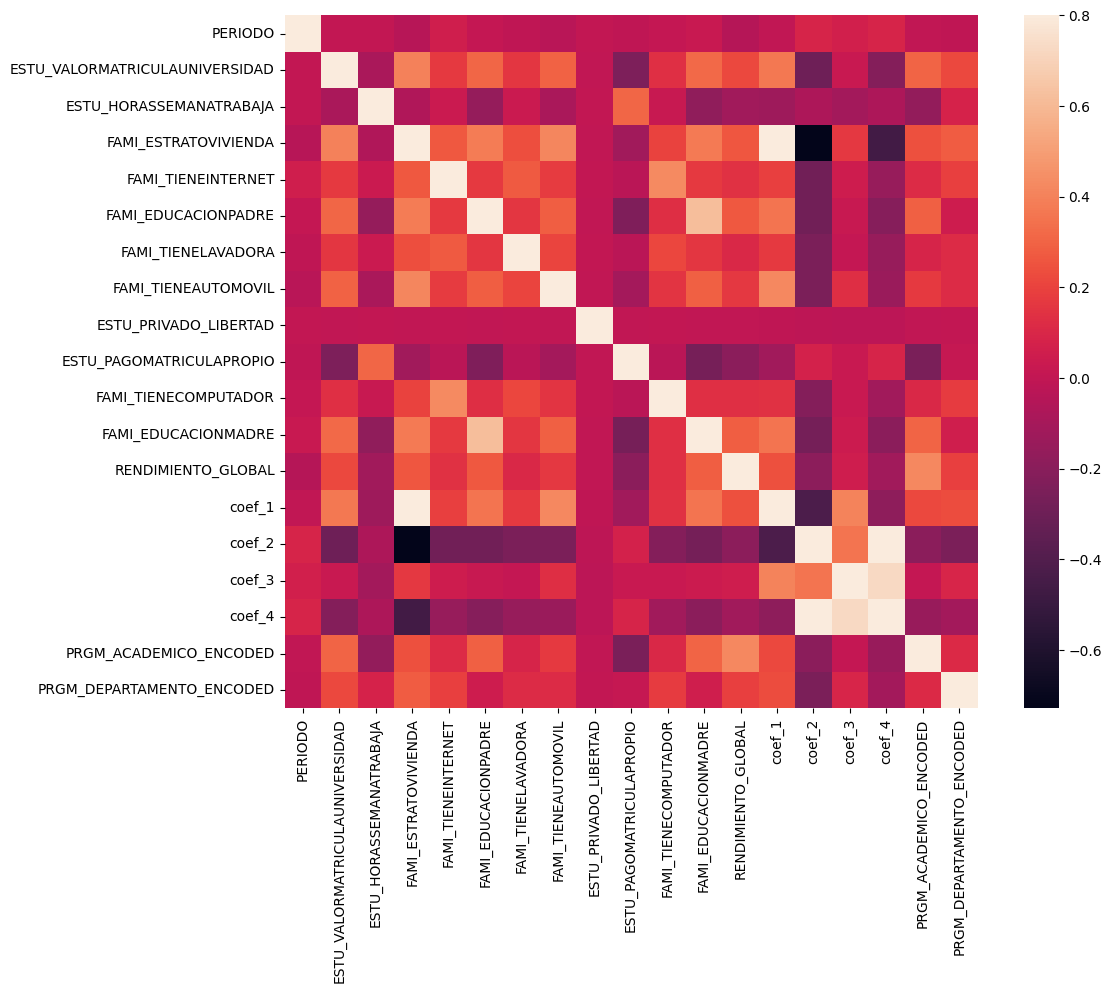

In [ ]:
corrmat = df._get_numeric_data().corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Aplicación del modelo de clasificación (RandomForestClassifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
X = df.drop(columns=['RENDIMIENTO_GLOBAL', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], axis=1) # Variables predictoras
y = df['RENDIMIENTO_GLOBAL']               # Variable objetivo

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Entrenar el modelo

In [ ]:
# Crear y entrenar el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###Testear el modelo con datos de prueba

In [ ]:
# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4162454873646209
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48     34573
           1       0.31      0.28      0.29     34503
           2       0.31      0.25      0.28     34259
           3       0.54      0.61      0.57     35165

    accuracy                           0.42    138500
   macro avg       0.40      0.41      0.41    138500
weighted avg       0.40      0.42      0.41    138500



#Aplicar el modelo a los datos de test

In [ ]:
df_t = pd.read_csv('test.csv')
df_t = test_treat_data(df_t)

X_train = df.drop(columns=['RENDIMIENTO_GLOBAL', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], axis=1) # Variables predictoras
y_train = df['RENDIMIENTO_GLOBAL']

X_test = df_t.drop(columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], axis=1) # Variables predictoras

#Entrenar el modelo con todos las datos de train
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

Valores únicos antes del tratamiento:
 ['Estrato 3' 'Estrato 2' 'Estrato 1' 'Estrato 4' nan 'Estrato 6'
 'Estrato 5' 'Sin Estrato']
Valores únicos después del tratamiento:
 [3 2 1 4 6 5 0]
Valores únicos antes del tratamiento:
 ['Si' 'No' nan]
Valores únicos después del tratamiento:
 [1 0]
Valores únicos antes del tratamiento:
 ['Técnica o tecnológica completa' 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Primaria incompleta' 'Ninguno'
 'Primaria completa' 'Postgrado' nan 'Educación profesional completa'
 'Técnica o tecnológica incompleta' 'Educación profesional incompleta'
 'No sabe' 'No Aplica']
Valores únicos después del tratamiento:
 [6 4 3 1 0 2 9 8 5 7]
Valores únicos antes del tratamiento:
 ['Primaria completa' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'Primaria incompleta' 'Postgrado'
 'Secundaria (Bachillerato) incompleta' nan 'Ninguno'
 'Educación profesional completa' 'Técnica o tecnológica incompleta'
 'Educación

#Crear archivo con los resultados para subir a Kaggle

In [ ]:
mapeo_clases = {
    0: 'bajo',
    1: 'medio-bajo',
    2: 'medio-alto',
    3: 'alto'
}

y_pred_series = pd.Series(y_pred, index=df_t.index)

# Mapear los valores numéricos a etiquetas de clases
y_pred_clases = y_pred_series.map(mapeo_clases)


# Crear el DataFrame final
resultado = pd.DataFrame({'RENDIMIENTO_GLOBAL': y_pred_clases})

# Guardar en un CSV
resultado.to_csv('predicciones.csv')